~~~ 
Cuestionario 1. Árboles de decisión
Máster universitario en Lógica, Computación e Inteligencia Artificial
Universidad de Sevilla
~~~

## **David Pineda Peña**

### _Objetivos del cuestionario_:

- Profundizar en algunos aspectos de los árboles de decisión.
- Ajustarse a la implementación y usos de árboles de decisión, sin llegar a utilizar técnicas como Random Forest o Gradient Boosting.
- Documentar todo el proceso de análisis de datos, desde la carga de los datos, hasta la evaluación de los modelos, y las diferentes
técnicas utilizadas, junto con las profundizaciones que realice el propio alumno.

### _Requisitos_:
- El cuestionario debe ser entregado en un notebook de Jupyter (archivo .ipynb).
- Se debe elegir una base de datos de las disponibles en el repositorio UCI Machine Learning Repository (https://archive.ics.uci.edu/).

### **¿Cómo vamos a plantear la resolución del cuestionario?**
- Para la resolución de este cuestionario iremos desarrollando de forma natural, buscando extraer información valiosa a partir del análisis exploratorio de los datos, tal y como un Científico de Datos haría en su día a día. Dado que haremos un desarrollo natural del cuestionario, iremos importando las librerías necesarias a medida que las necesitemos, para que así quede reflejada la línea de pensamiento que hemos seguido. 

## a) Carga de datos

La base de datos elegida es la de "Estimation of obesity levels based on eating habits and physical condition". (https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition)

Toda la información acerca de las variables y el estudio a partir del cual se ha construido el dataset se encuentra en el artículo:
"https://doi.org/10.1016/j.dib.2019.104344"

In [1]:
import pandas as pd

df = pd.read_csv('../datasets/ObesityDataSet_raw_and_data_sinthetic.csv')
df.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

- Gender: Género del individuo (masculino, femenino).
- Age: Edad del individuo.
- Height: Altura del individuo.
- Weight: Peso del individuo.
- Family History with Overweight: Historia familiar de sobrepeso (sí o no).
- FAVC: Frecuencia de consumo de alimentos altos en calorías (sí o no).
- FCVC: Frecuencia de consumo de verduras.
- NCP: Número de comidas principales al día.
- CAEC: Consumo de alimentos entre comidas (Nunca, A veces, Frecuentemente, Siempre).
- SMOKE: Si el individuo fuma o no.
- CH2O: Consumo de agua al día.
- SCC: Calorías consumidas durante el día (sí o no).
- FAF: Frecuencia de actividad física a la semana.
- TUE: Tiempo usando dispositivos electrónicos al día.
- CALC: Consumo de alcohol (Nunca, A veces, Frecuentemente, Siempre).
- MTRANS: Medio de transporte utilizado (Automóvil, Motocicleta, Bicicleta, Transporte público, Caminando).
- **Obesity Level: Nivel de obesidad (categorías como Bajo Peso, Normal, Sobrepeso, Obesidad Tipo I, II, III). <- Variable objetivo.**

In [2]:
for col in df.columns:
    print(f"{col} has --- {len(df[col].unique())} --- unique values")
    print (df[col].unique())
    print("----------------------------------------------------")

Gender has --- 2 --- unique values
['Female' 'Male']
----------------------------------------------------
Age has --- 1402 --- unique values
[21.       23.       27.       ... 22.524036 24.361936 23.664709]
----------------------------------------------------
Height has --- 1574 --- unique values
[1.62     1.52     1.8      ... 1.752206 1.73945  1.738836]
----------------------------------------------------
Weight has --- 1525 --- unique values
[ 64.        56.        77.       ... 133.689352 133.346641 133.472641]
----------------------------------------------------
family_history_with_overweight has --- 2 --- unique values
['yes' 'no']
----------------------------------------------------
FAVC has --- 2 --- unique values
['no' 'yes']
----------------------------------------------------
FCVC has --- 810 --- unique values
[2.       3.       1.       2.450218 2.880161 2.00876  2.596579 2.591439
 2.392665 1.123939 2.027574 2.658112 2.88626  2.714447 2.750715 1.4925
 2.205439 2.059138 2.31

In [3]:
# Veamos un resumen de la estadística descriptiva de los datos
df.describe()

Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75%       2.477420     1.666678     1.000000  
max       3.000000     3.000000     2.000000

Vamos a comprobar los tipos de datos que tenemos en el dataset, y si hay valores nulos.

In [4]:
print(df.dtypes)

categorical_columns = df.dtypes[df.dtypes == 'object'].index.tolist()
print("\nCategorical columns", categorical_columns)


Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

Categorical columns ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']


In [5]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

Como podemos observar, no hay valores nulos en el dataset, y todos los datos se dividen en: numéricos (float64) y categóricos (object).

Nos encontramos con una situación típica en la que tenemos variables categóricas, y para poder trabajar con ellas, debemos transformarlas en numéricas. Para ello, debemos considerar que hay 2 tipos de variables categóricas: 
- Ordinales: Son aquellos valores discretos que tienen un orden o nivel de preferencia, por ejemplo: "bajo", "medio", "alto". Lo podríamos codificar como: "bajo" = 0 < "medio" = 1 < "alto" = 2.
- Nominales: Son aquellos valores discretos que no tienen una relación entre ellos, por ejemplo: "españa", "francia", "alemania".

Para los datos ordinales, después de codificarlos y entrenar al modelo, debemos transformarlos a su valor original, para que se puede predecir correctamente el valor objetivo. Sin embargo, para los datos nominales, no es necesario hacer esta transformación, ya que no tienen un orden o nivel de preferencia, y por tanto la información que aportan es la misma.

Existe una gran variedad de técnicas para transformar variables categóricas en numéricas:

- Drop Categorical Variables: Se eliminan las variables categóricas. Esta técnica solo se utiliza cuando las variables no aportan información relevante al modelo.

- Create Dummies (One Hot Encoding): Se crea una columna por cada categoría, y se asigna un 1 a la categoría a la que pertenece el individuo, y un 0 al resto de categorías. Por ejemplo, si tenemos las categorías: "rojo", "verde", "azul", se crearían las columnas: "rojo", "verde", "azul", y se asignaría un 1 a la columna "rojo" si el individuo pertenece a esa categoría, y un 0 al resto de columnas. El problema de esta técnica es que si tenemos muchas categorías, el número de columnas aumenta considerablemente, y esto puede llevar a problemas de memoria.

- Ordinal Number Encoding: Se asigna un número a cada categoría según un orden definido. Como su propio nombre indica, esta técnica se emplea para variables ordinales, ya que si la empleásemos para variables nominales, podríamos hacer que el modelo infiriese que hay un orden entre las categorías, cuando en realidad no lo hay.

- Label Encoding: Similar al Ordinal Number Encoding, con la diferencia que no se utiliza para codificar variables categóricas ordinales, si no variables objetivo donde no hay un orden de prefencia (nominal).


*Para una explicación más detallada de la diferencia entre Ordinal Number Encoding y Label Encoding, o las técnicas de codificación se puede consultar la bibliografía*

Aunque hayamos mencionado solo 4, existen muchas más técnicas las cuales no desarrollamos por motivos prácticos: Binary Encoding, Mean Encoding, Probability Ratio Encoding, Hashing Encoding, etc.

En el caso de nuestro dataset tenemos que los diferentes atributos categóricos se dividen en:

- Ordinales: CAEC, CALC.
- Nominales: Gender, family_history_with_overweight, FAVC, SMOKE, SCC, MTRANS.

Es por ello que para los atributos ordinales utilizaremos la técnica de Ordinal Number Encoding, y para los atributos nominales utilizaremos la técnica de One Hot Encoding, dado que cada una de nuestras variables categóricas, cuentan con pocas categorías y no supone un problem. 

Aunque la mejor práctica sería validar el modelo con las diferentes técnicas, y quedarnos con la que mejor resultado nos dé, con fin de simplificar el cuestionario, nos quedaremos con estas 2 técnicas.

In [6]:
encoded_df = df # Hacemos una copia para no modificar el original

In [7]:
print(list(df.CAEC.unique()))
print(list(df.CALC.unique()))

['Sometimes', 'Frequently', 'Always', 'no']
['no', 'Sometimes', 'Frequently', 'Always']


In [8]:
# Codificación Ordinal para CAEC y CALC: no < Sometimes < Frequently < Always
ordinal_dict = {'no': 1, 'Sometimes': 2, 'Frequently': 3, 'Always': 4}

encoded_df['CAEC'] = encoded_df['CAEC'].map(ordinal_dict)
encoded_df['CALC'] = encoded_df['CALC'].map(ordinal_dict)


In [9]:
df.NObeyesdad.unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [10]:
# Codificación Ordinal para NObeyesdad (variable objetivo): Insufficient_Weight < Normal_Weight < Overweight_Level_I < Overweight_Level_II < Obesity_Type_I < Obesity_Type_II < Obesity_Type_III
obesity_dict = {'Insufficient_Weight': 1, 'Normal_Weight': 2, 'Overweight_Level_I': 3, 'Overweight_Level_II': 4, 'Obesity_Type_I': 5, 'Obesity_Type_II': 6, 'Obesity_Type_III': 7}
encoded_df['NObeyesdad'] = encoded_df['NObeyesdad'].map(obesity_dict)

In [11]:
from sklearn.preprocessing import OneHotEncoder

# One-Hot Encoding para variables nominales
one_hot = OneHotEncoder()
nominal_vars = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'MTRANS']
nominal_vars_encoded = one_hot.fit_transform(df[nominal_vars]).toarray()
encoded_df = pd.DataFrame(nominal_vars_encoded, columns=one_hot.get_feature_names_out(nominal_vars))

# Eliminamos las variables categoricas nominales originales
numeric_df = df.drop(columns=nominal_vars, axis=1)

# Concatenamos las variables codificadas con el resto
encoded_df = pd.concat([numeric_df, encoded_df], axis=1)

Veamos el resultado final del dataframe después de la codificación de las variables categóricas:

In [12]:
print(df.head())
print(df.columns)

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP  CAEC SMOKE  CH2O  SCC  FAF  TUE  CALC                 MTRANS  \
0  3.0     2    no   2.0   no  0.0  1.0     1  Public_Transportation   
1  3.0     2   yes   3.0  yes  3.0  0.0     2  Public_Transportation   
2  3.0     2    no   2.0   no  2.0  1.0     3  Public_Transportation   
3  3.0     2    no   2.0   no  2.0  0.0     3                Walking   
4  1.0     2    no   2.0   no  0.0  0.0     2  Public_Transportation   

   NObeyesdad  
0           2  
1           2  
2           2  
3           3  
4           4  
Index(['

In [13]:
print(encoded_df.columns)
print(encoded_df.head())

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'FAF', 'TUE',
       'CALC', 'NObeyesdad', 'Gender_Female', 'Gender_Male',
       'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes', 'SMOKE_no',
       'SMOKE_yes', 'SCC_no', 'SCC_yes', 'MTRANS_Automobile', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')
    Age  Height  Weight  FCVC  NCP  CAEC  CH2O  FAF  TUE  CALC  ...  FAVC_yes  \
0  21.0    1.62    64.0   2.0  3.0     2   2.0  0.0  1.0     1  ...       0.0   
1  21.0    1.52    56.0   3.0  3.0     2   3.0  3.0  0.0     2  ...       0.0   
2  23.0    1.80    77.0   2.0  3.0     2   2.0  2.0  1.0     3  ...       0.0   
3  27.0    1.80    87.0   3.0  3.0     2   2.0  2.0  0.0     3  ...       0.0   
4  22.0    1.78    89.8   2.0  1.0     2   2.0  0.0  0.0     2  ...       0.0   

   SMOKE_no  SMOKE_yes  SCC_no  SCC_yes  MTRANS_Automobile  MTRANS_Bike 

## b) Análisis exploratorio

Para realizar el examen exploratorio de los datos por medio de gráficos, se van a utilizar las librerías matplotlib y seaborn.

Matplotlib es una librería de Python para la generación de gráficos a partir de datos contenidos en listas o arrays. Seaborn es una librería de Python para la visualización de datos basada en matplotlib. Proporciona una interfaz de alto nivel para dibujar gráficos estadísticos atractivos e informativos.

La principal diferencia entre matplotlib y seaborn es que seaborn proporciona una interfaz de alto nivel para dibujar gráficos estadísticos atractivos e informativos. Por otro lado, matplotlib es una librería de bajo nivel que ofrece una gran variedad de funciones para la generación de gráficos.

Seaborn está construido sobre matplotlib y se puede considerar un "superset" de Matplotlib. Sepuede utilizar para generar gráficos más atractivos y elaborados. Por ejemplo, seaborn tiene funciones para crear gráficos de violín y gráficos de cajas, gráficos de dispersión conjunta y muchos más.

| Característica | Matplotlib | Seaborn |
| --- | --- | --- |
Funcionalidad | Nivel básico | Alto nivel
Sintaxis | Compleja | Simple
Manejo de múltiples figuras | Complejo | Simple
Visualización | Básica | Atractiva y elaborada
Flexibilidad | Menos | Más
DataFrames y Arrays | No | Sí
Casos de uso | Gráficos simples | Gráficos estadísticos


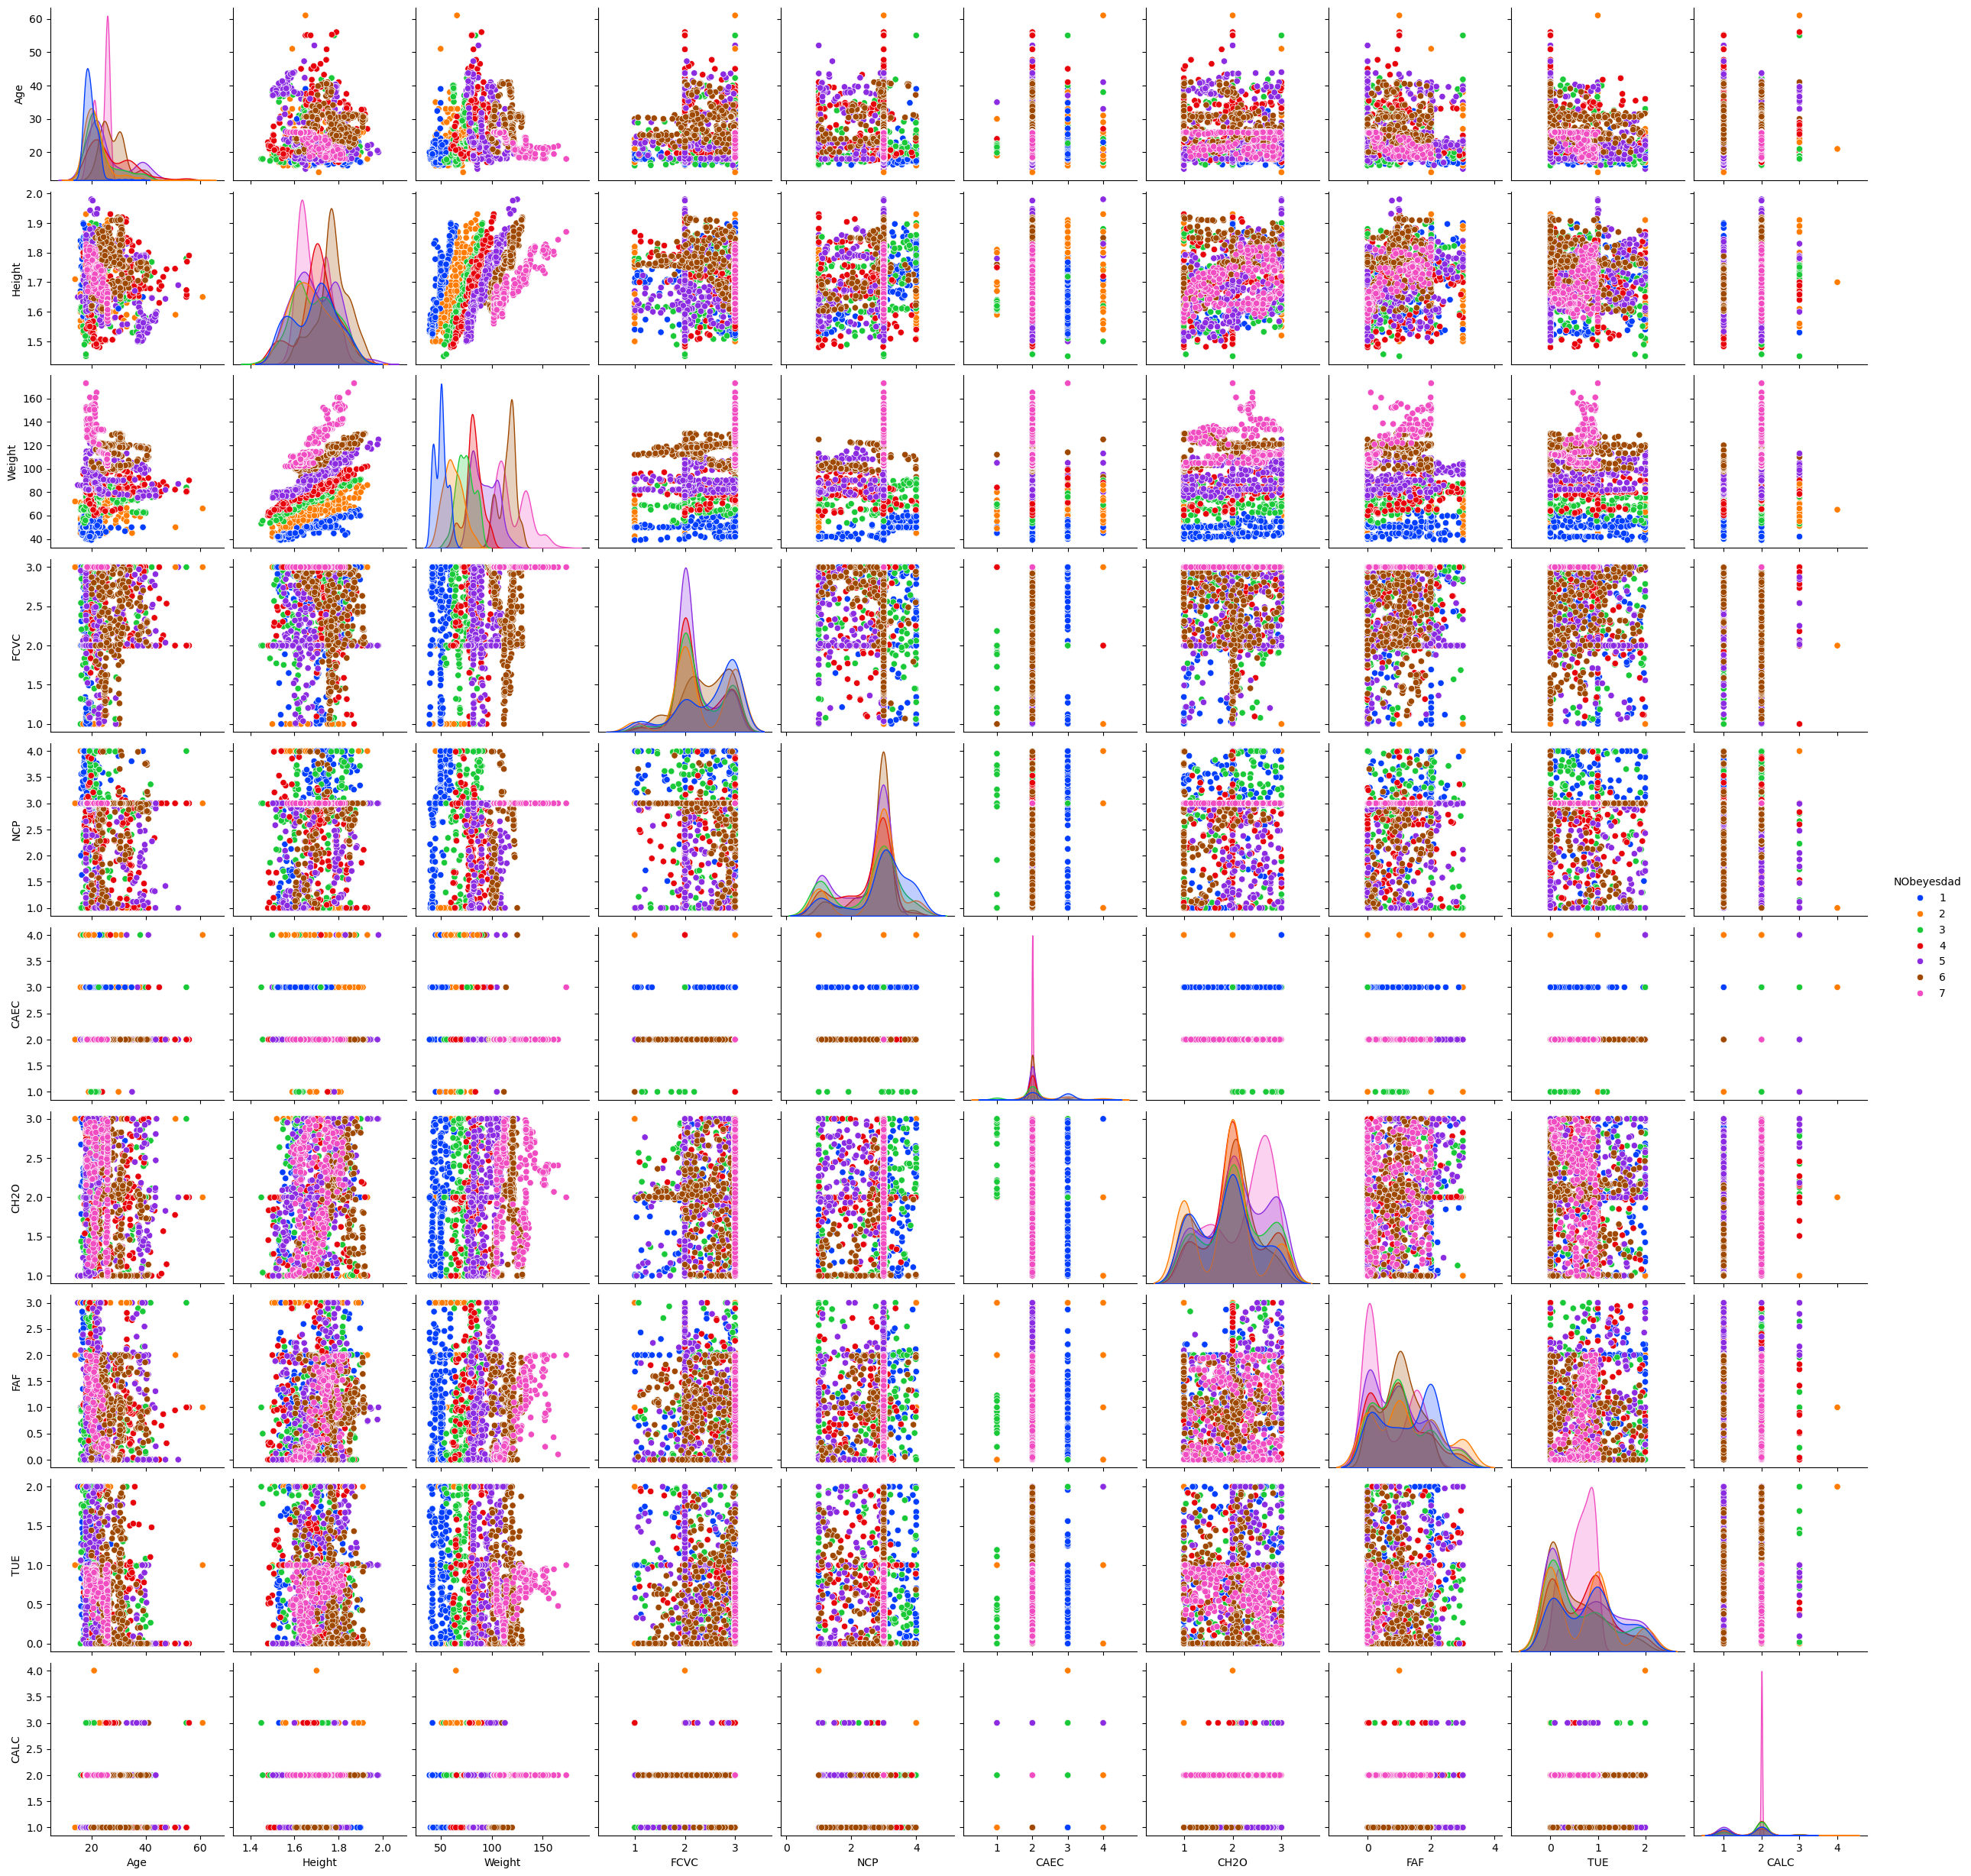

In [14]:

import matplotlib.pyplot as plt
import seaborn as sns

# Vamos a ver la distribución de los datos numéricos, sobre la variable objetivo.
sns.pairplot(df, hue='NObeyesdad', palette='bright') # hue: variable objetivo, palette: colores (bright, deep, muted, pastel, dark, colorblind)
plt.show()

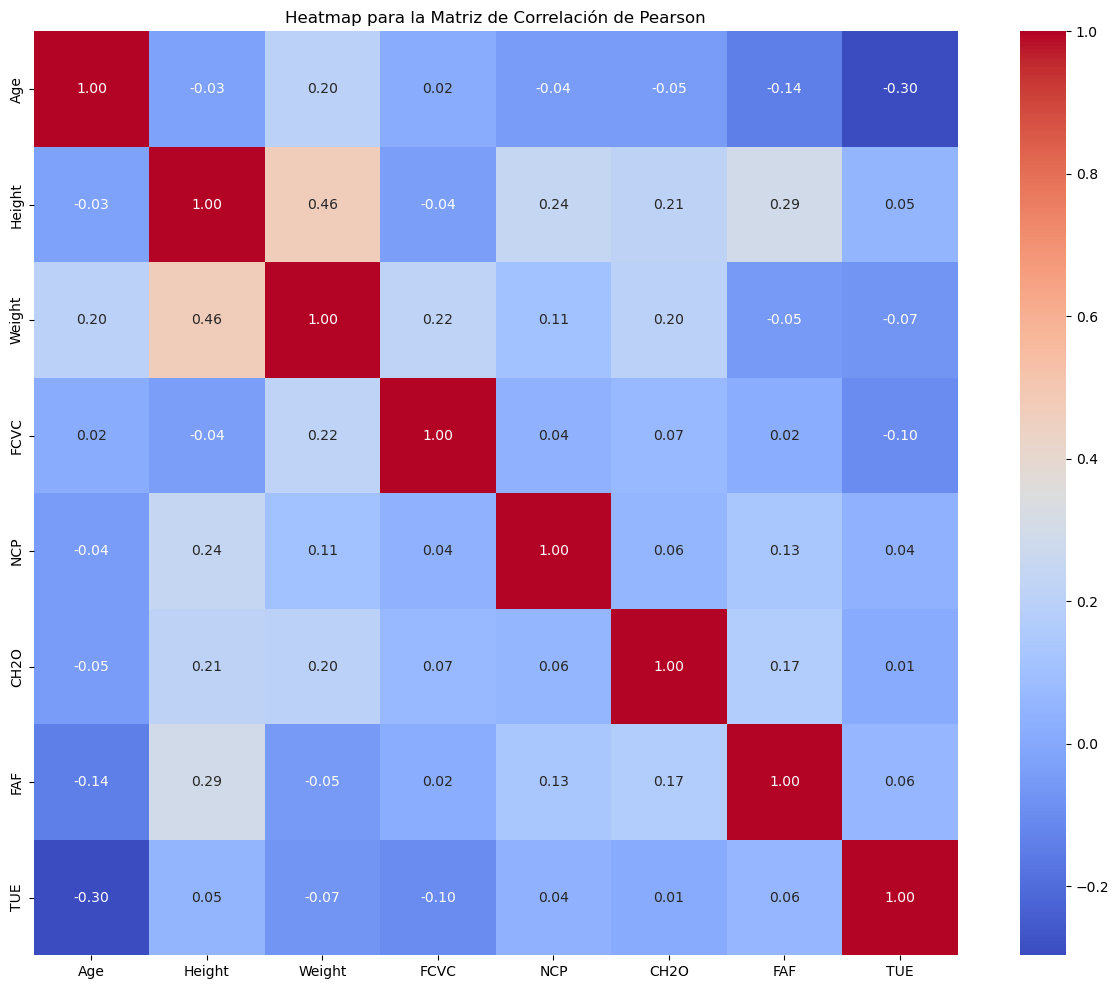

In [15]:
# Calculamos la matriz de correlación de Pearson para todas las variables numéricas.
numeric_vars_df = df.drop(columns=categorical_columns, axis=1)

pearson_corr_matrix = numeric_vars_df.corr(method='pearson')

# Generamos el heatmap para la matriz de correlación de Pearson.
plt.figure(figsize=(16,12))
sns.heatmap(pearson_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Heatmap para la Matriz de Correlación de Pearson')
plt.show()


In [16]:
sns.__version__ 

'0.13.0'

Es importante tener seaborn actualizado a la versión 0.13.0, ya que en la versión 0.12.2 hay un bug en el que solo se muestran los valores para la primera fila en el heatmap.

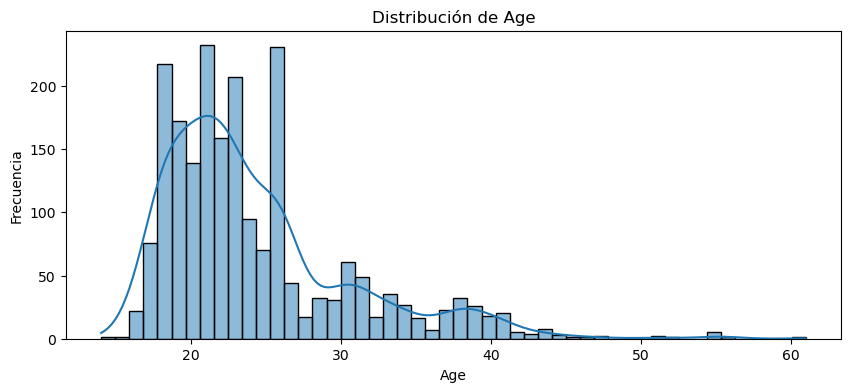

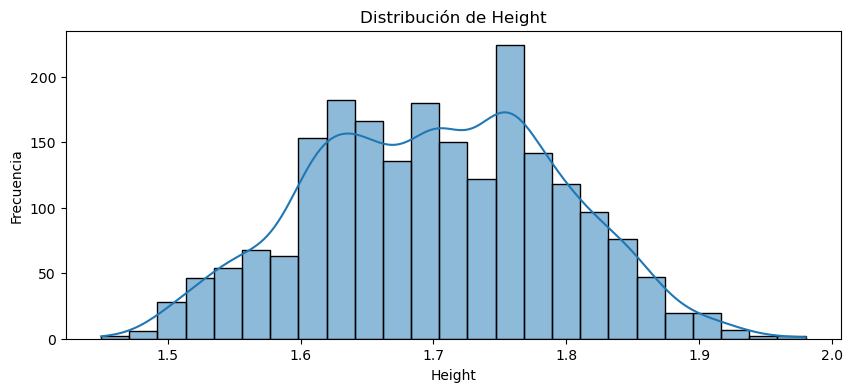

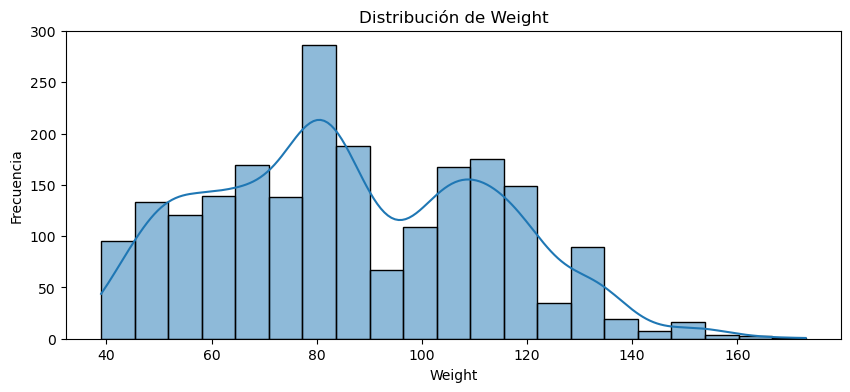

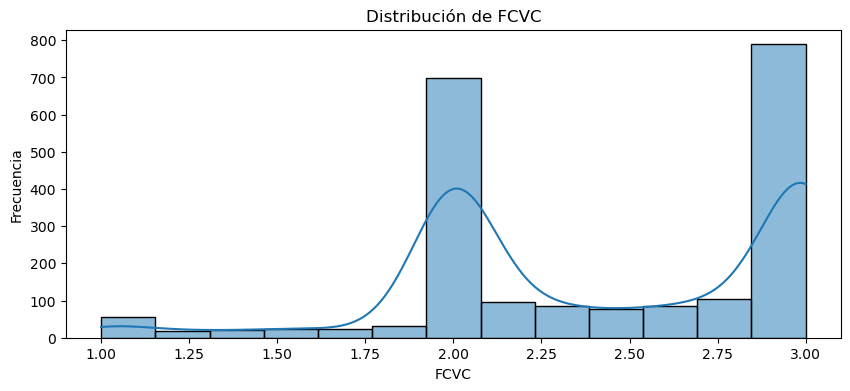

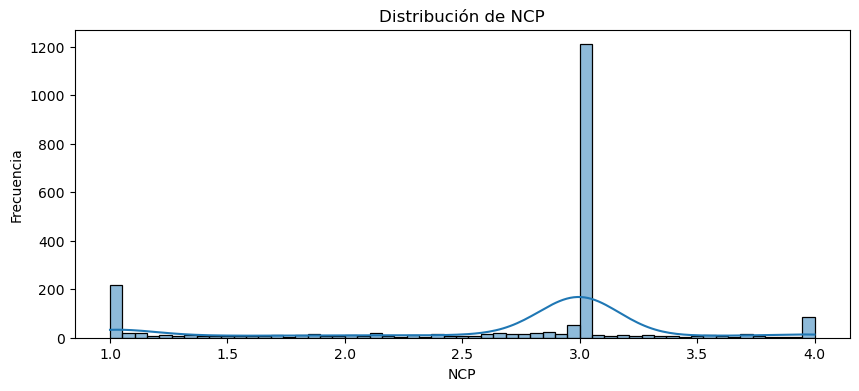

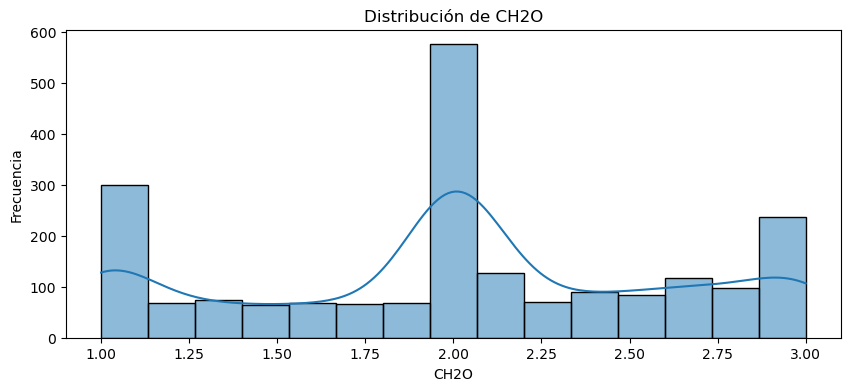

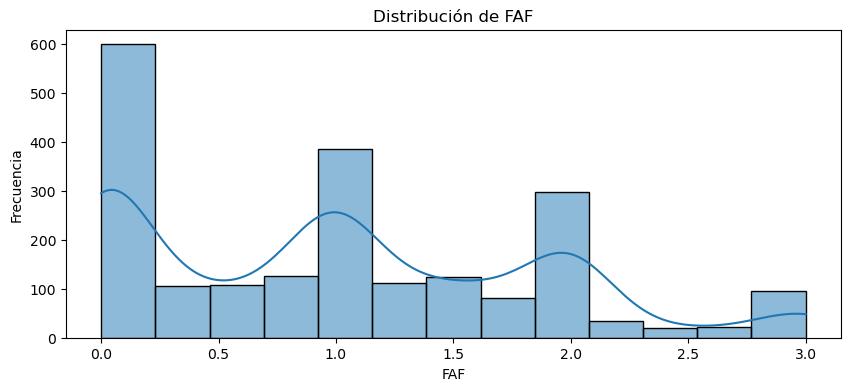

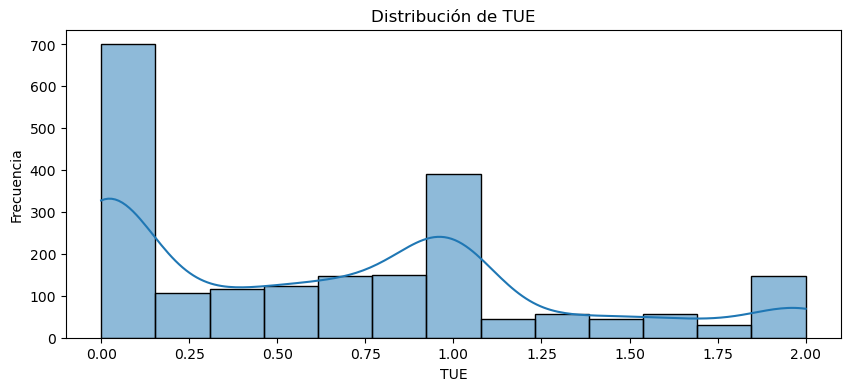

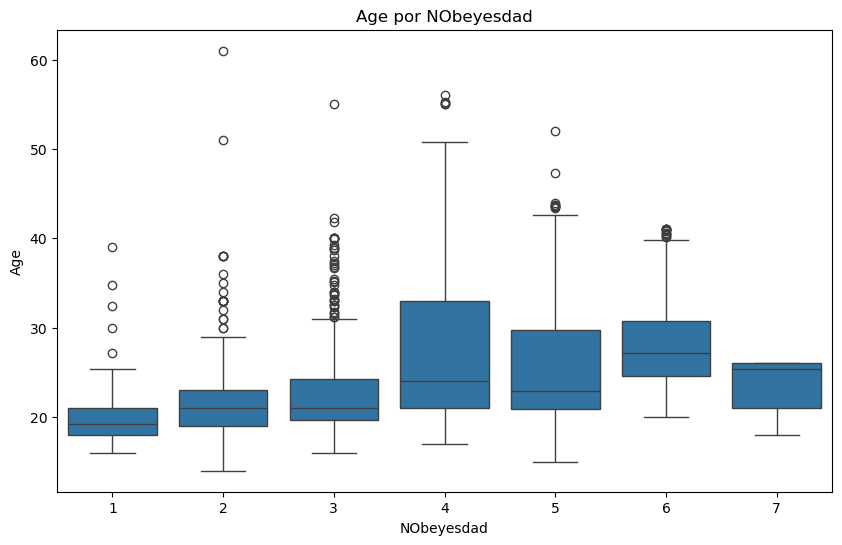

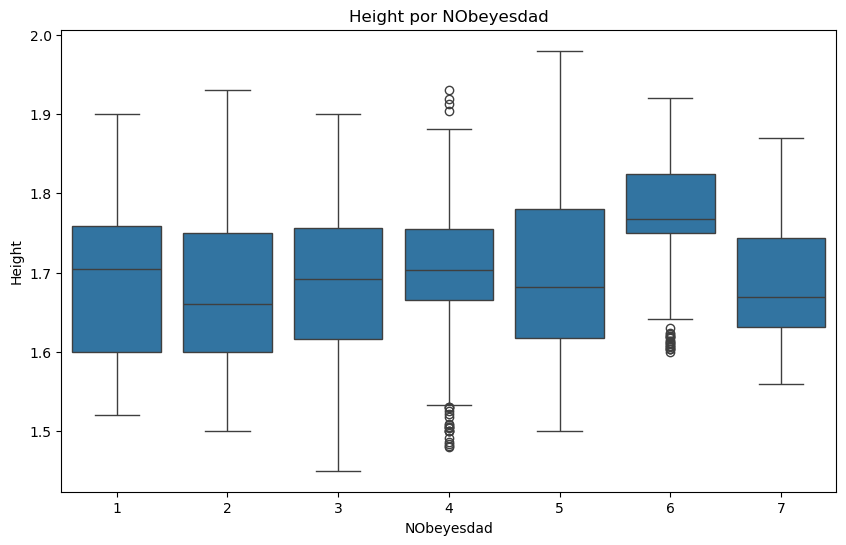

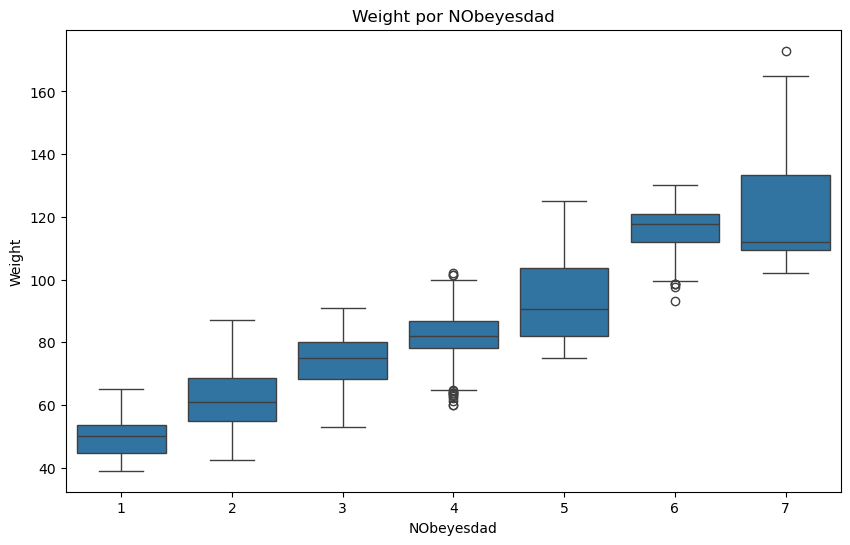

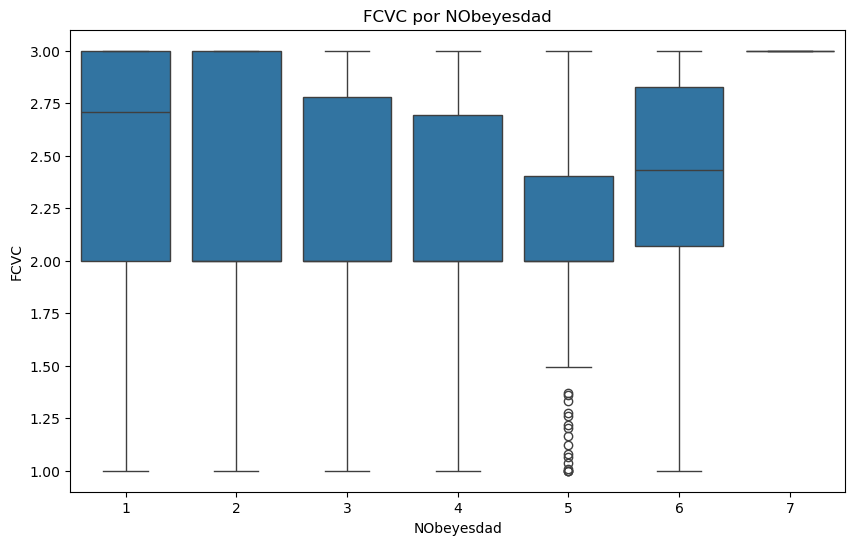

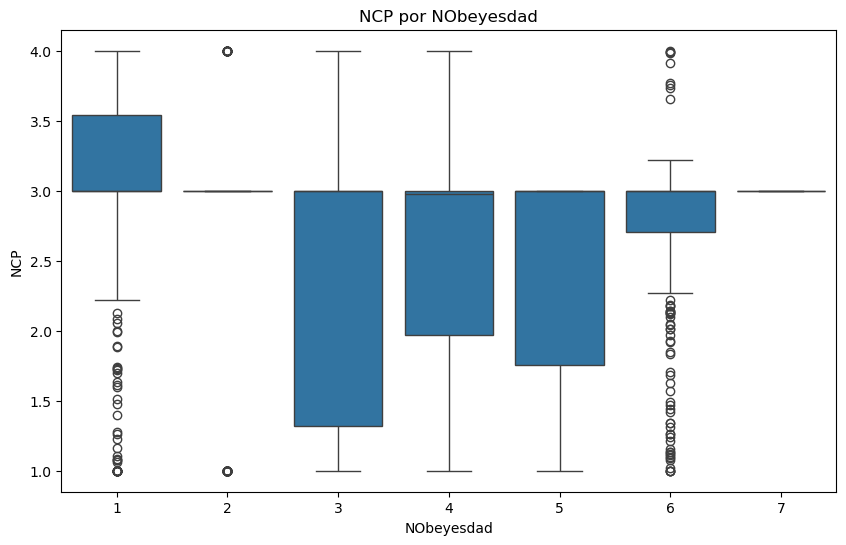

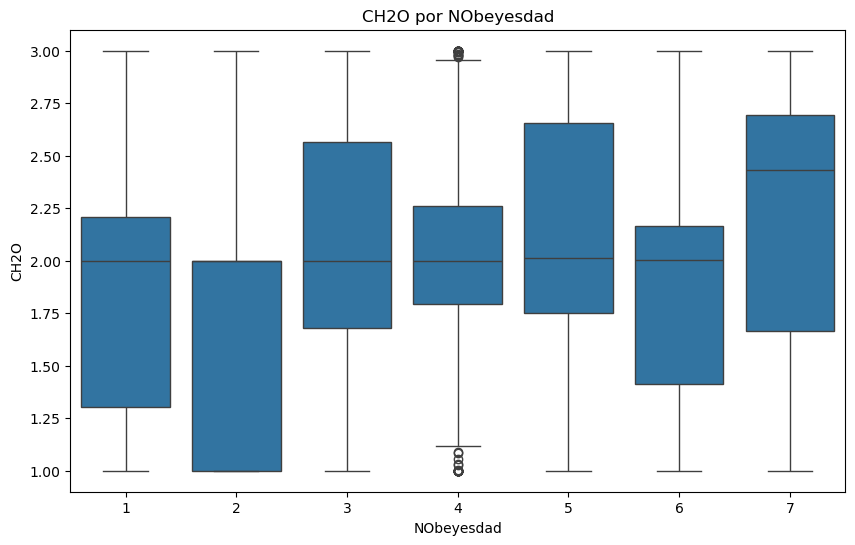

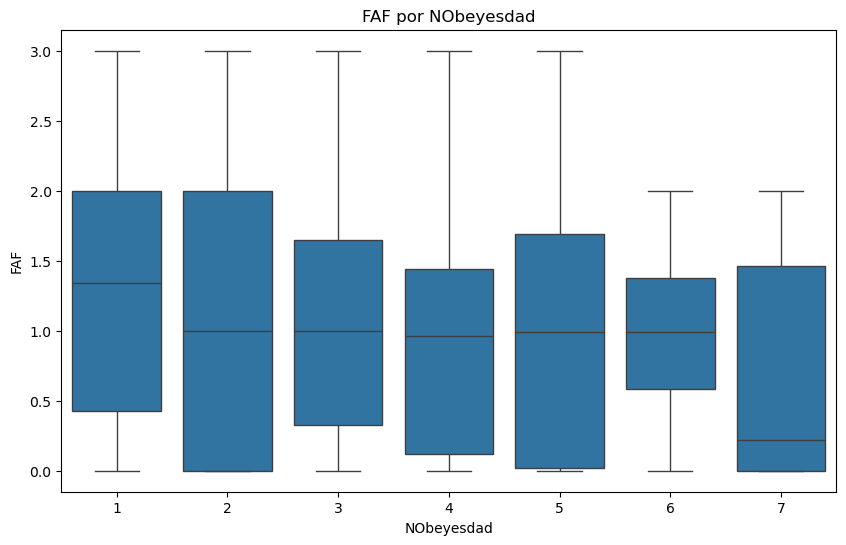

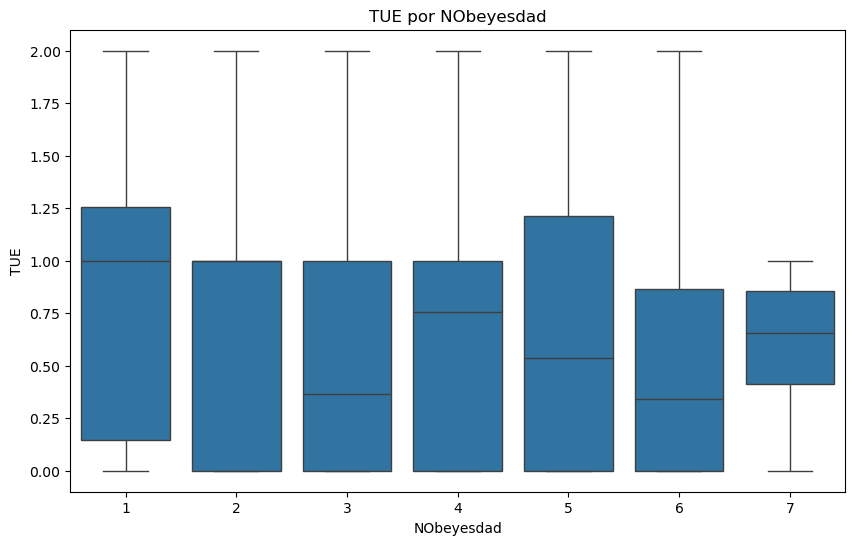

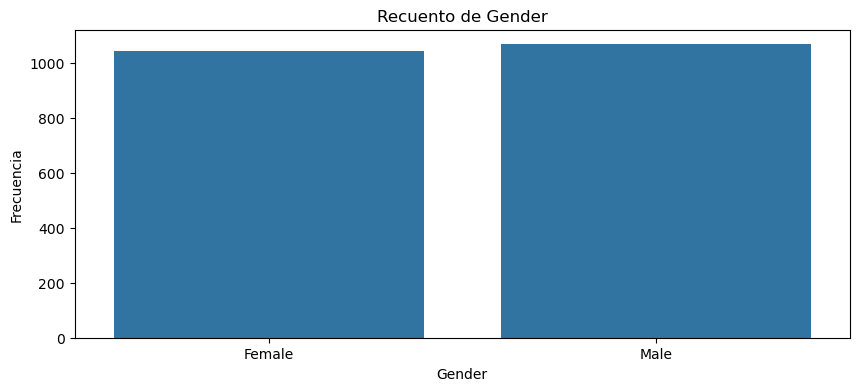

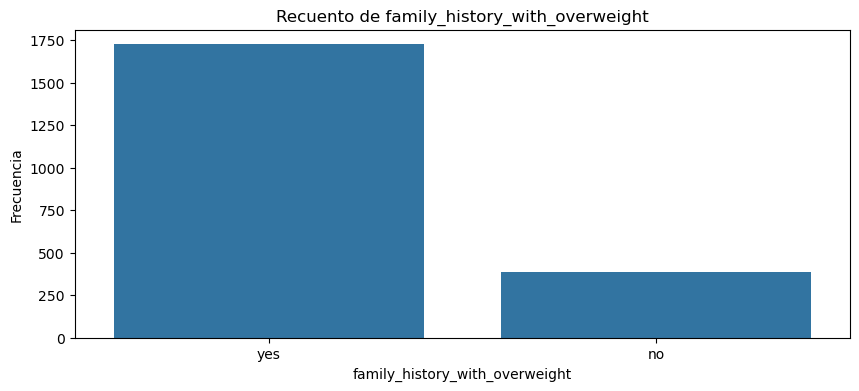

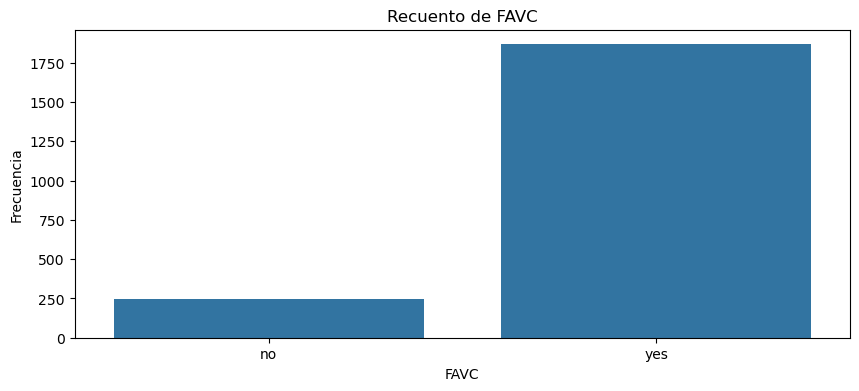

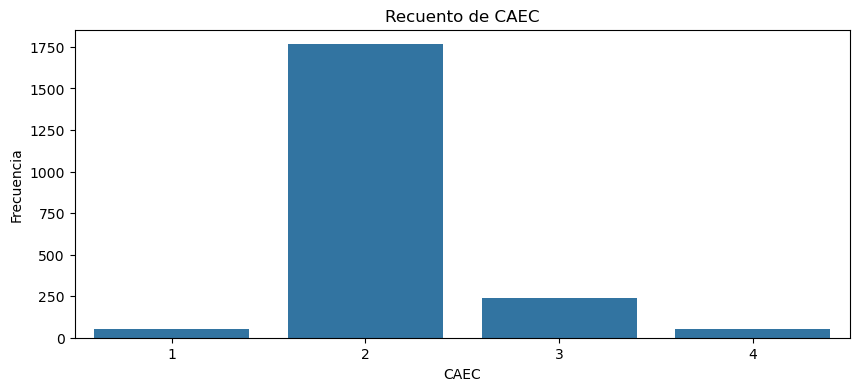

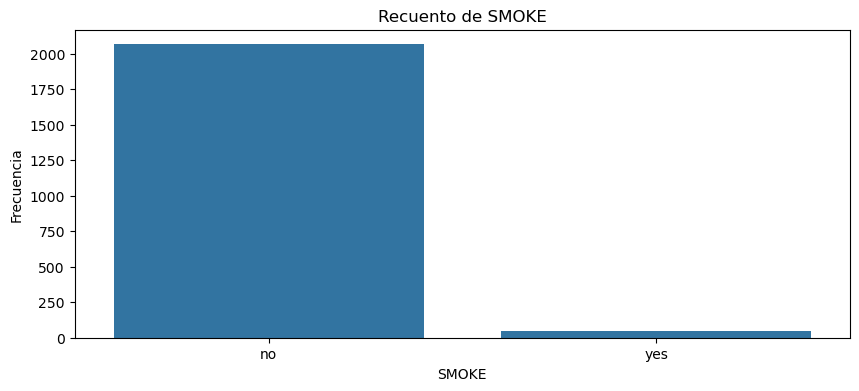

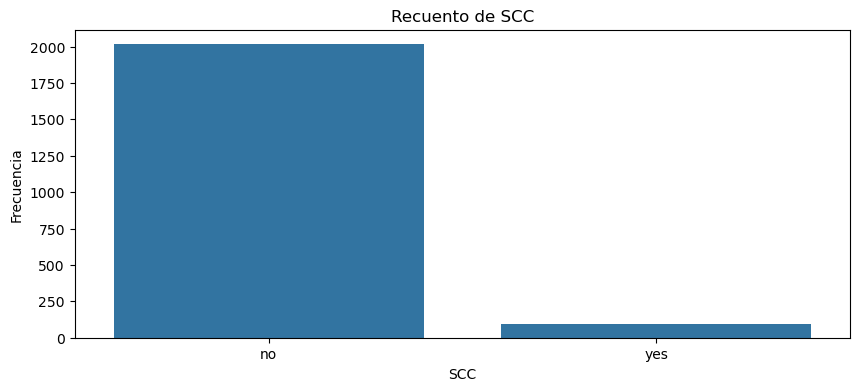

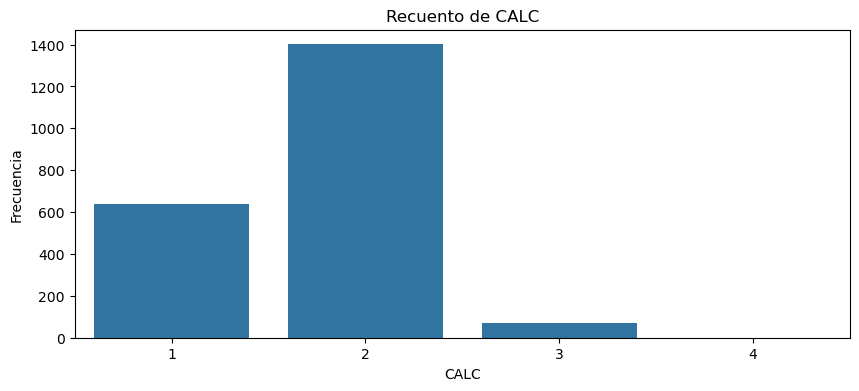

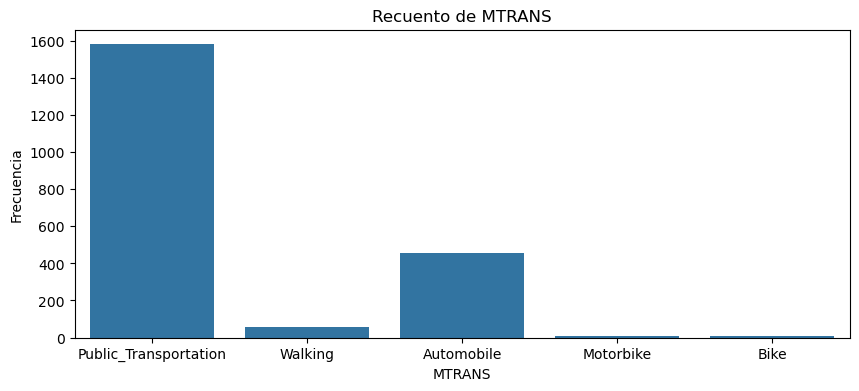

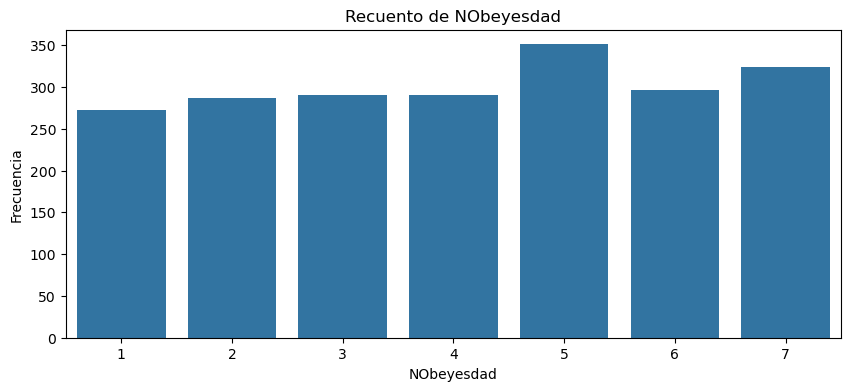

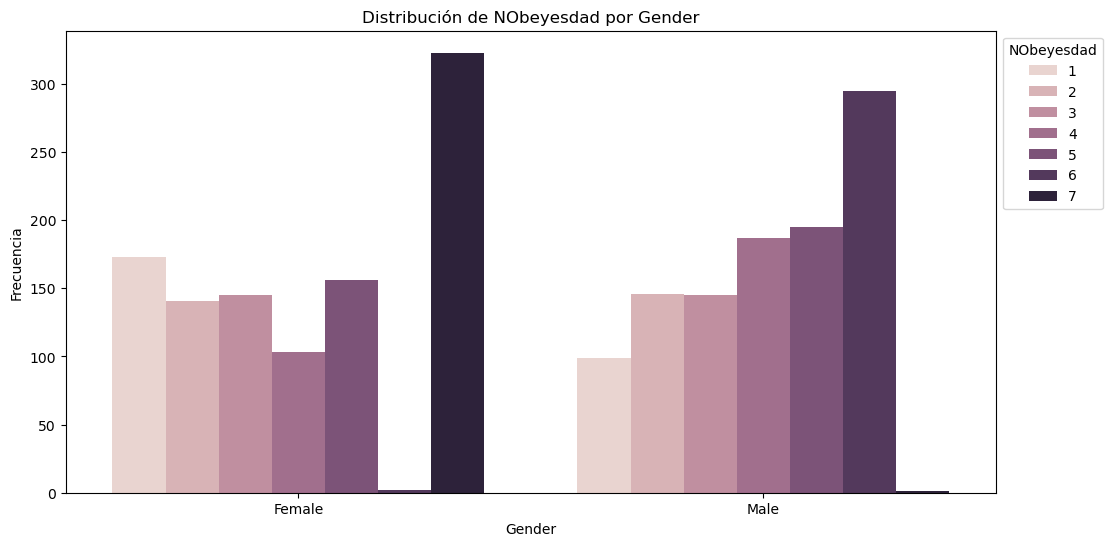

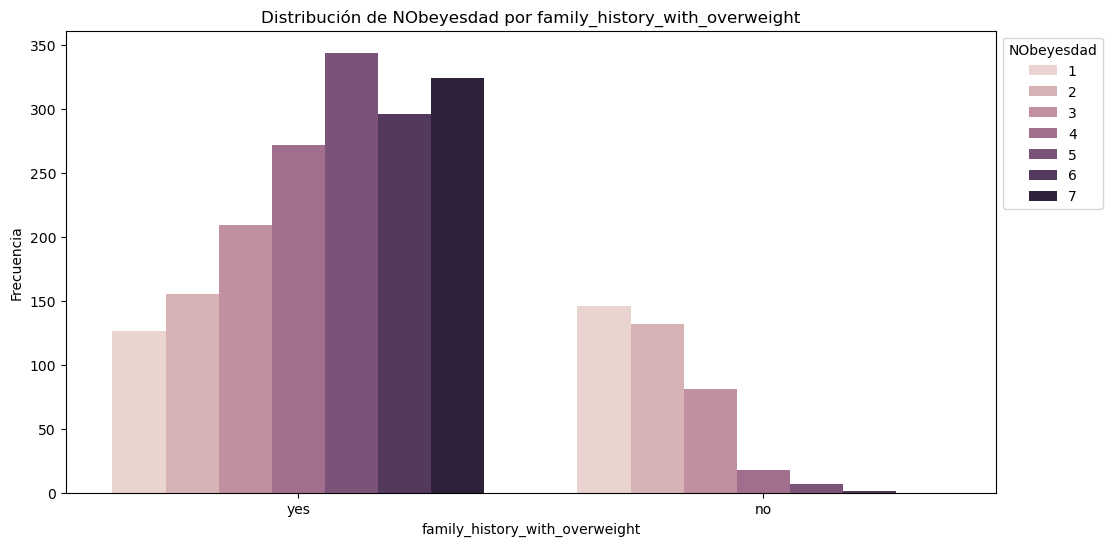

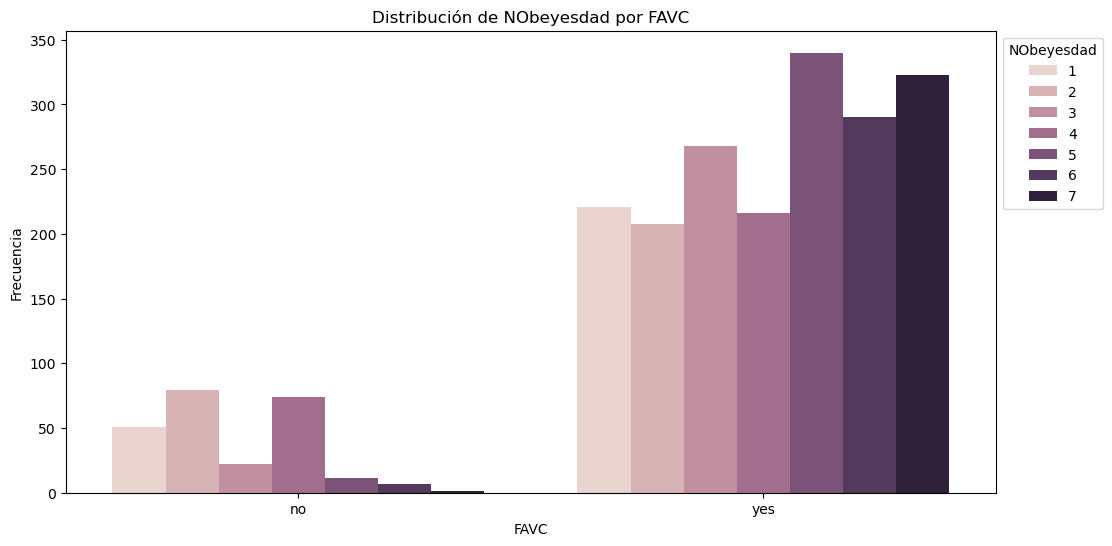

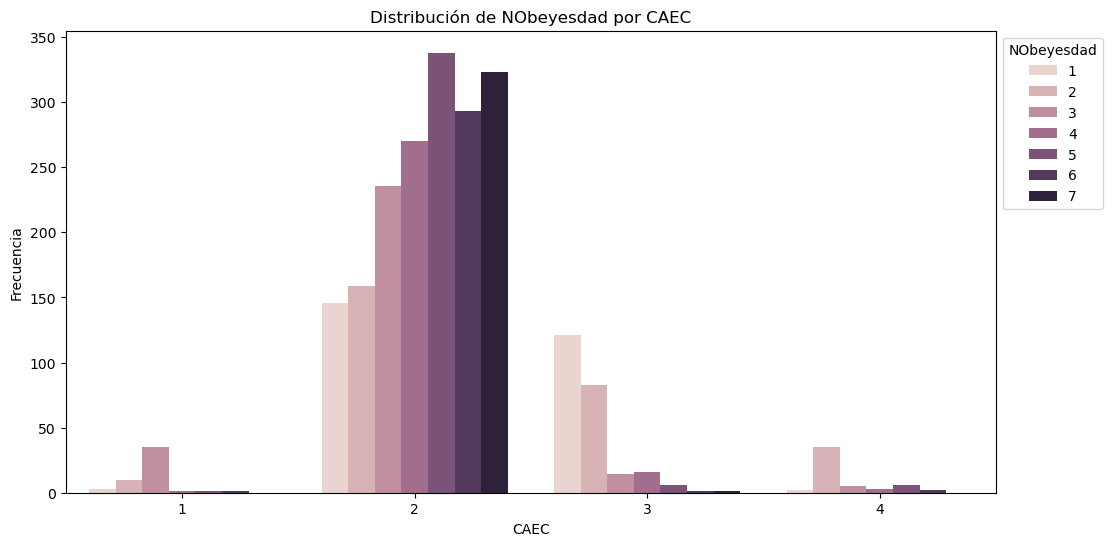

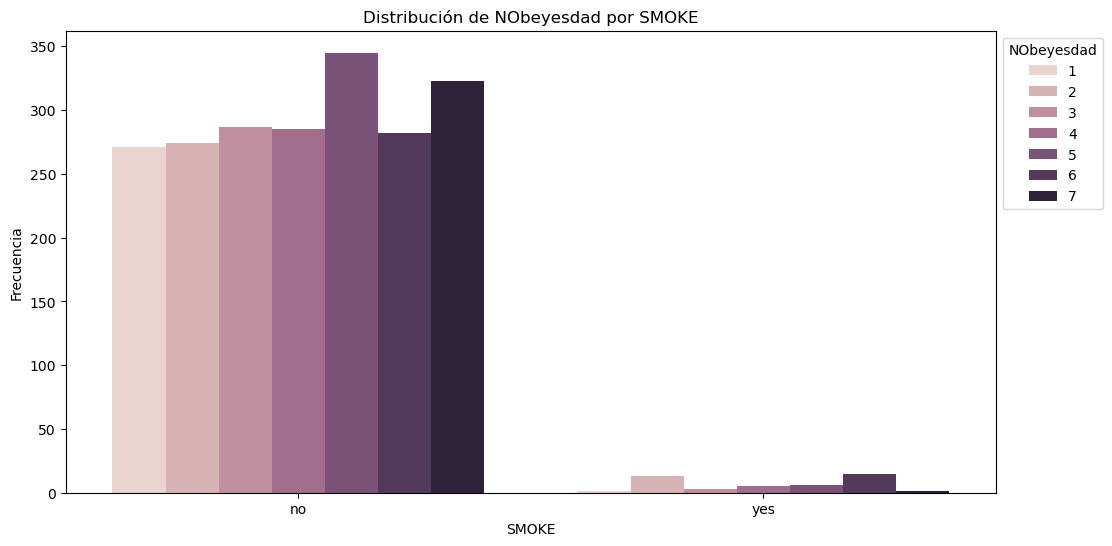

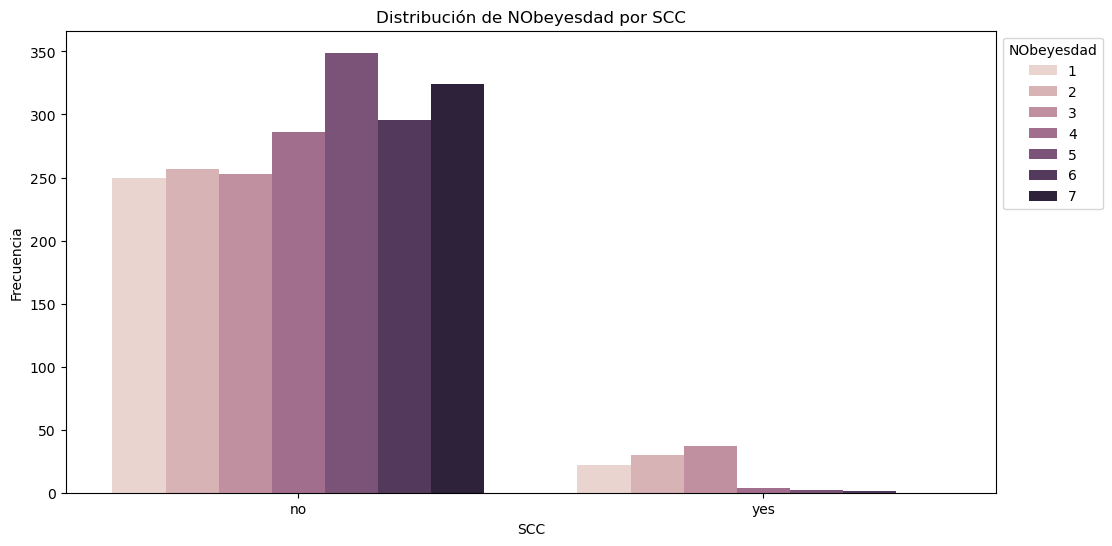

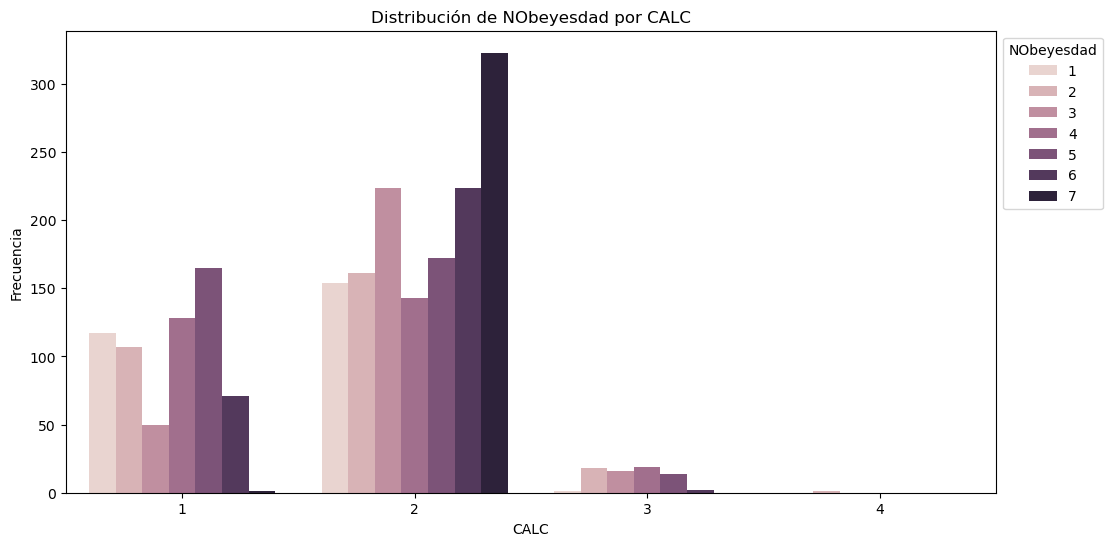

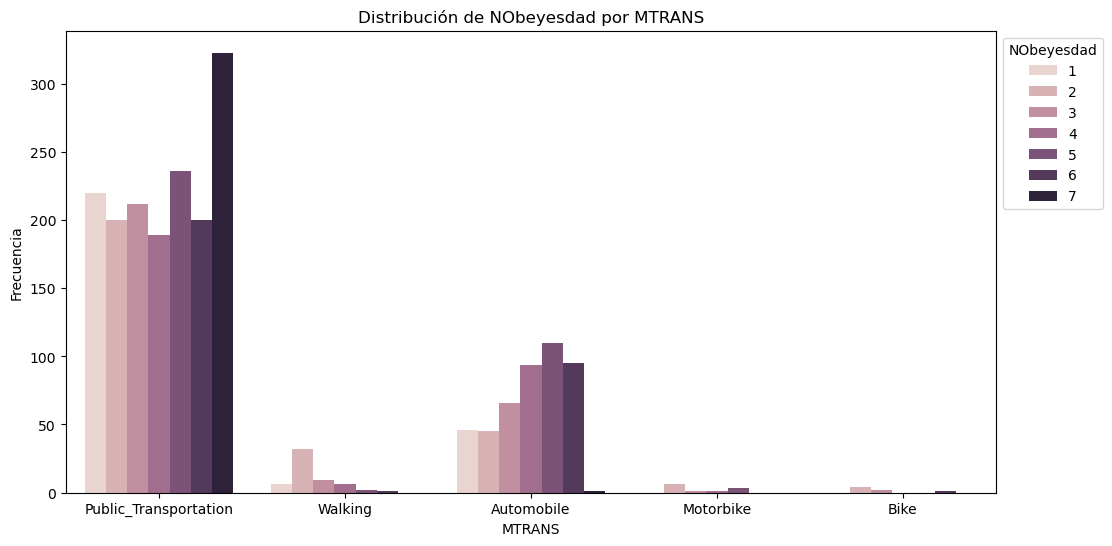

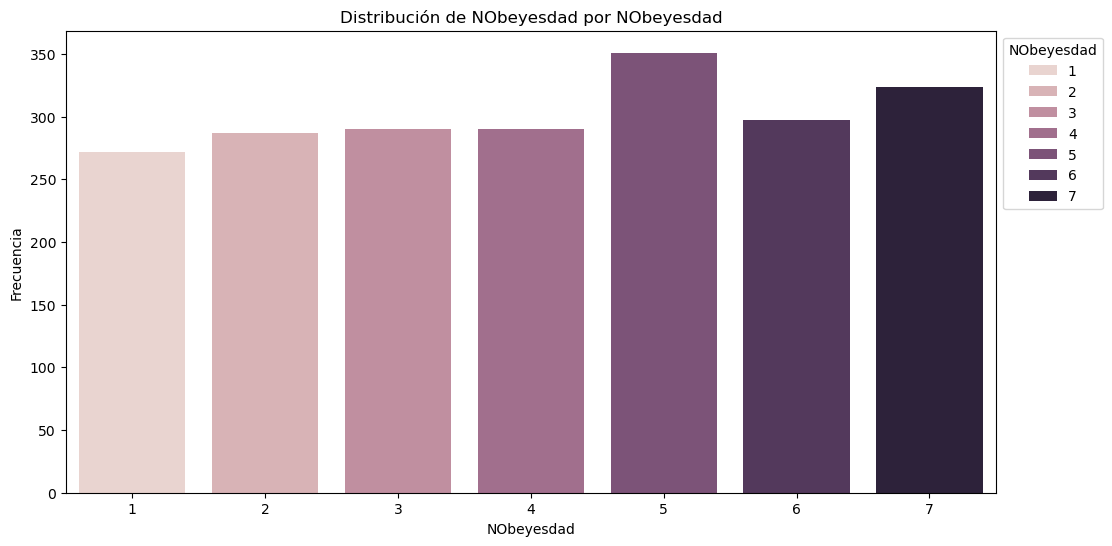

In [17]:
# Distribuciones de las variables numéricas.
# ==============================================================================
for column in df.select_dtypes(include=["float64"]).columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()
# ==============================================================================

# Boxplots para las variables numéricas por cada categoría de NObeyesdad.
# ==============================================================================
for column in df.select_dtypes(include=["float64"]).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='NObeyesdad', y=column, data=df)
    plt.title(f'{column} por NObeyesdad')
    plt.ylabel(column)
    plt.xlabel('NObeyesdad')
    plt.show()
# ==============================================================================

# Recuentos de las variables categóricas.
# ==============================================================================
for column in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=column, data=df)
    plt.title(f'Recuento de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()
# ==============================================================================

# Variables categóricas vs NObeyesdad
# ==============================================================================
for column in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=column, hue='NObeyesdad', data=df)
    plt.title(f'Distribución de NObeyesdad por {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.legend(title='NObeyesdad', bbox_to_anchor=(1, 1), loc='upper left')
    plt.show()
# ==============================================================================

De los diferentes gráficos extraídos, y el análisis estadístico descriptivo previo, podemos observar que:	

- La mayoría de los individuos son jóvenes, con una edad media de 24 años.
- La mayoría de los individuos son mujeres.
- La mayoría de los individuos tienen un peso normal, altura media de 1.70m y un peso medio de 86.5kg.
- La mayoría de los individuos tienen historial familiar de sobrepeso.
- La mayoría de los individuos no fuman.
- Existe una correlación positiva entre variables como la altura y el peso, lo cual es esperado. Sin embargo, estas correlaciones no son perfectas, lo que indica que hay variabilidad que podría ser explicada por otros factores, como el nivel de actividad física o los hábitos alimenticios.
- La distribución de personas con sobrepeso que utiliza transporte público es mayor que la de personas que deciden caminar o utilizar la bicicleta o la moto. Esto puede tener una explicación relacionada con el nivel de actividad física pasiva, aunque también debemos considerar, y es cierto que, los datos no están balanceados, y por tanto, no podemos sacar conclusiones definitivas.
- El número de mujeres con sobrepeso es significativamente mayor que el de hombres con sobrepeso. Esto puede deberse a factores genéticos, dado que las mujeres tienen un menor consumo calórico pasivo que los hombres, además de tener una mayor tendencia a la reserva de grasa corporal.

Existen muchas más conclusiones que se pueden extraer de los gráficos, pero dado que no es el objetivo principal de este cuestionario, consideramos que con las anteriores es suficiente.

## c) Modelado de Árbol de Decisión y conjunto de entrenamiento y test

In [18]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
import time

# Obtenemos las variables predictoras y la variable objetivo
X = encoded_df.drop(columns=['NObeyesdad'], axis=1)
y = encoded_df['NObeyesdad']

# Dividimos el dataset en conjuntos de entrenamiento y prueba, estratificando por la variable objetivo para mantener la proporción de clases.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df['NObeyesdad']) 

In [19]:
# Construimos el modelo de árbol de decisión
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## d) Representación gráfica del árbol de decisión

Para la representación gráfica del árbol, nos vamos a basar en el método [`export_graphviz`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html) de la librería `tree`, visto en clase.

In [20]:
export_graphviz(clf, 
                out_file='obesity_tree.dot', 
                feature_names=X.columns, 
                class_names=['Insufficient_Weight', 'Normal_Weight', 
                             'Overweight_Level_I', 'Overweight_Level_II', 
                             'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'], 
                filled=True, 
                rounded=True)

In [21]:
!dot -Tpng obesity_tree.dot -o obesity_tree.png


(process:22796): GLib-GIO-WARNING **: 23:42:11.511: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2309.16.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs

(process:22796): GLib-GIO-WARNING **: 23:42:11.570: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.8.3.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs


<Figure size 640x480 with 0 Axes>

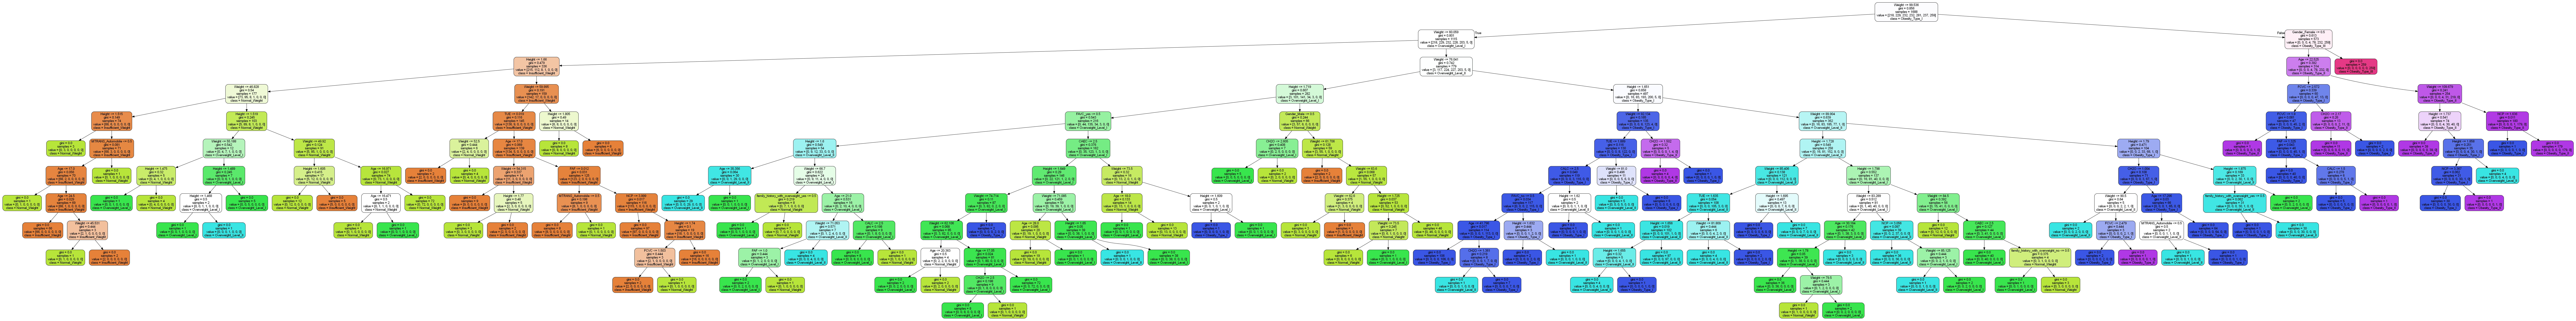

In [22]:
plt.clf()
image = plt.imread('obesity_tree.png')
height, width, depth = image.shape
dpi = 100
figsize = width / float(dpi), height / float(dpi)
plt.figure(figsize=figsize).add_axes([0, 0, 1, 1])
plt.axis('off')
plt.imshow(image)
plt.show()

Como podemos observar, el árbol de decisión generado es muy complejo, y no es fácil de interpretar. Esto se debe a varios factores:

- No se ha empleado niguna técnica de poda, por lo que el árbol ha crecido hasta el máximo posible.
- El dataset tiene muchas variables, y por tanto, el árbol tiene muchos nodos.

De momento, utilizaremos este árbol para evaluar el modelo, y posteriormente, en la sección de "Profundización en el algoritmo de árboles de decisión", trataremos de reducir la complejidad del árbol.

Podemos ver que el primer criterio que toma el árbol es una frontera de decisión en la variable de "Peso". A partir de ahí, la rama izquierda (< 99.53kg), continua explotando los diferentes valores de peso y altura, mientras que la rama derecha (>= 99.53kg), explota los valores de género y edad, dado que en el análisis exploratorio de los datos, vimos que principalmente, el conjunto de individuos con sobrepeso se componía de mujeres jóvenes.

## e) Evaluación del modelo (score)

In [23]:
# Calculamos la medida de rendimiento del árbol sobre el conjunto de prueba, entrenamiento, y total.
from sklearn.metrics import accuracy_score # Tanto la función score como accuracy_score calculan la exactitud del clasificador, que es el número de predicciones correctas sobre el número total de muestras.

y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
y_pred_total = clf.predict(X)

print(f"Rendimiento para el conjunto de prueba: {accuracy_score(y_test, y_pred)}")
print(f"Rendimiento para el conjunto de entrenamiento: {accuracy_score(y_train, y_pred_train)}")
print(f"Rendimiento para el conjunto total: {accuracy_score(y, y_pred_total)}")

Rendimiento para el conjunto de prueba: 0.9219858156028369
Rendimiento para el conjunto de entrenamiento: 1.0
Rendimiento para el conjunto total: 0.984367598294647


Inevitablemente, el conjunto de entrenamiento ha obtenido un score de 1.0, ya que el modelo ha sido entrenado con esos datos. El resultado del conjunto de test es de ~0.92 lo cual no es un mal resultado, pero tampoco es excelente.

Vamos a mostrar la matriz de confusión para el conjunto de prueba, de tal forma que podamos ver cuántas muestras de cada clase se han clasificado correctamente, y cuántas se han clasificado incorrectamente. Para ello, vamos a utilizar la librería `metrics` de `sklearn`.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [24]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[47,  7,  0,  0,  0,  0,  0],
       [ 1, 50,  7,  0,  0,  0,  0],
       [ 0,  6, 48,  4,  0,  0,  0],
       [ 0,  0,  1, 55,  2,  0,  0],
       [ 0,  0,  0,  0, 70,  0,  0],
       [ 0,  0,  0,  0,  3, 56,  1],
       [ 0,  0,  0,  0,  0,  1, 64]], dtype=int64)

Ahora dibujamos la matriz de confusión de manera gráfica, para que sea más fácil de interpretar.
Como podemos observar, la clasificación para la clase normal es perfecta, esto tiene cierta relación con que la clase normal es la que más muestras tiene, y por tanto, el modelo ha aprendido mejor a clasificarla.

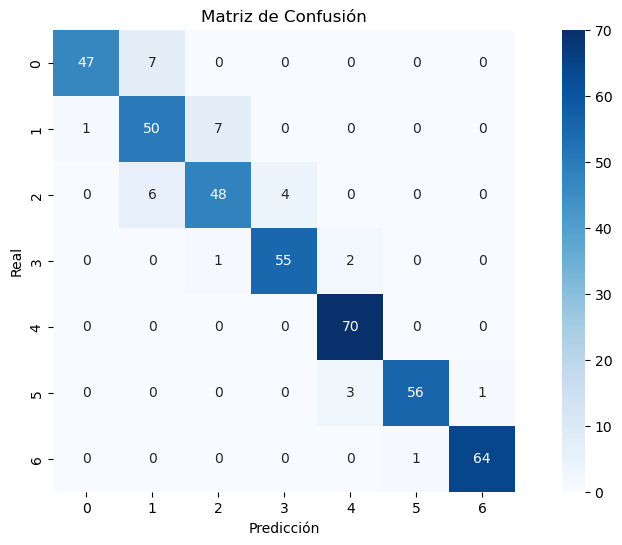

In [25]:
plt.figure(figsize=(12, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', cmap='Blues', square=True)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

Vamos a probar a utilizar una validación cruzada con 10 folds, para obtener una medida más fiable del rendimiento del modelo.

In [26]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

scores = cross_val_score(clf, X_train, y_train, cv=skf, scoring='accuracy')

print(f"Exactitud para cada partición:\n{scores}")
print(f"\nExactitud media: {scores.mean()}")
print(f"Desviación estándar de la exactitud: {scores.std()}")
print(f"Intervalo de confianza: {scores.mean()} +/- {scores.std() * 2}")

Exactitud para cada partición:
[0.89349112 0.91715976 0.92899408 0.90532544 0.93491124 0.9408284
 0.95266272 0.9112426  0.94047619 0.92857143]

Exactitud media: 0.9253663003663004
Desviación estándar de la exactitud: 0.017353698242064272
Intervalo de confianza: 0.9253663003663004 +/- 0.034707396484128544


## 2. Profundización en el algoritmo de árboles de decisión

Un dato muy interesante que podemos obtener del árbol es la importancia relativa de cada característica. Esta importancia se mide como la reducción total de impureza que proporciona la característica, ponderada por la probabilidad de alcanzar ese nodo del árbol. Es decir, la importancia de una característica es la reducción de impureza que produce al dividir el conjunto de datos, ponderada por la probabilidad de alcanzar ese nodo del árbol.

La importancia de una característica es un valor entre 0 y 1, y la suma de las importancias de todas las características es 1.

Como podemos observar, la característica más importante es el peso, seguida de la altura, y, el género 'femenino' particularmente, dado que es el segundo criterio que toma el árbol. Esto tiene sentido, ya que el peso y la altura son características físicas que están muy relacionadas con el nivel de obesidad de un individuo, y en el caso de nuestro dataset, el género femenino es el que más individuos con sobrepeso tiene.

*La fórmla para calcular la impureza de Gini es la siguiente, se puede consultar la bibliografía para más información*

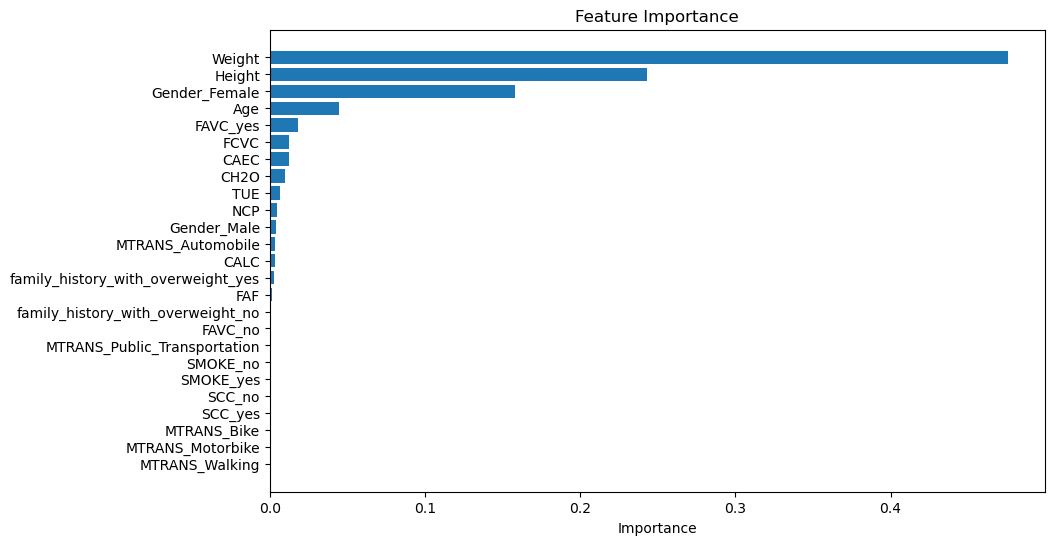

In [27]:
import numpy as np

# Calculamos la importancia de las diferentes características basándonos en la reducción de la impureza de Gini
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)

# Visualizamos la importancia de las características
plt.figure(figsize=(10,6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), X.columns[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

Otro método interesante a investigar y con el que experimentar son, la búsqueda de hiperparámetros óptimos para el modelo, y la poda del árbol.

Para la búsqueda de hiperparámetros óptimos, vamos a utilizar la librería `GridSearchCV` de `sklearn`, la cual nos permite realizar una búsqueda exhaustiva de los mejores hiperparámetros para el modelo, a partir de una lista de valores que nosotros le proporcionamos.

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Mejor score: {grid_search.best_score_}")
print(f"Mejor estimador: {grid_search.best_estimator_}")

Mejores parámetros: {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mejor score: 0.9389707302512598
Mejor estimador: DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)


Una vez realizado el GridSearch, podemos volver a entrenar el modelo con los mejores hiperparámetros encontrados. Esta vez además, vamos a evaluar al modelo con métricas de rendimiento, adicionales a las vista en clase como serían: Accuracy, Precision, Recall, F1-Score, etc. 

Para ello, vamos a utilizar la función `classification_report` de la librería `metrics` de `sklearn`.

In [29]:
best_tree = grid_search.best_estimator_
best_tree.fit(X_train, y_train)

y_pred_best = best_tree.predict(X_test)
print(f"Accuracy (Mejor Modelo): {accuracy_score(y_test, y_pred_best)}")
print(classification_report(y_test, y_pred_best))

Accuracy (Mejor Modelo): 0.9527186761229315
              precision    recall  f1-score   support

           1       1.00      0.89      0.94        54
           2       0.85      0.97      0.90        58
           3       0.95      0.90      0.92        58
           4       0.97      0.97      0.97        58
           5       0.97      0.99      0.98        70
           6       0.97      0.97      0.97        60
           7       0.98      0.98      0.98        65

    accuracy                           0.95       423
   macro avg       0.95      0.95      0.95       423
weighted avg       0.96      0.95      0.95       423



Para ir finalizando este cuestionario, vamos a experimentar con la poda del árbol. Utilizaremos diferentes parámetros para la poda, y compararemos los resultados con los obtenidos anteriormente.
Una vez hayamos entrenado y evaluado el modelo con todas las combinaciones de parámetros, vamos a mostrar los resultados en una tabla ordenada, para que sea más fácil de interpretar.

Por motivos computacionales, vamos a experimentar con la característica `max_depth`, la cual limita la profundidad máxima del árbol, y 'min_samples_leaf', la cual limita el número mínimo de muestras que debe tener una hoja.

In [30]:
# Volvemos a dividir el dataset en conjuntos de entrenamiento y prueba
X = encoded_df.drop('NObeyesdad', axis=1)
y = encoded_df['NObeyesdad']

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

results = [] # Lista para almacenar los resultados de cada modelo

# Parámetros de poda
# ========================================================================
max_depth_params = [None, 3, 5, 7]  # None significa árbol sin podar
min_samples_leaf_params = [1, 2, 4, 6]
# ========================================================================

# Iteramos sobre los parámetros de poda
for max_depth in max_depth_params:
    for min_samples_leaf in min_samples_leaf_params:
        tree = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=42)
        tree.fit(X_train, y_train)
        y_pred = tree.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        cross_val_scores = cross_val_score(tree, X_train, y_train, cv=5)
        mean_cross_val_score = np.mean(cross_val_scores)
        
        # Almacenamiento de los resultados
        results.append({
            'max_depth': max_depth,
            'min_samples_leaf': min_samples_leaf,
            'test_accuracy': accuracy,
            'mean_cross_val_score': mean_cross_val_score
        })


results_df = pd.DataFrame(results) # Construimos un DataFrame con los resultados

# Finalmente, ordenamos los resultados por la exactitud del conjunto de prueba.
sorted_results_df = results_df.sort_values(by='test_accuracy', ascending=False)

In [31]:
sorted_results_df

max_depth  min_samples_leaf  test_accuracy  mean_cross_val_score
1         NaN                 2       0.926714              0.913502
0         NaN                 1       0.921986              0.914689
2         NaN                 4       0.910165              0.917643
3         NaN                 6       0.907801              0.911137
12        7.0                 1       0.884161              0.883873
13        7.0                 2       0.879433              0.881511
14        7.0                 4       0.874704              0.879729
15        7.0                 6       0.874704              0.879142
8         5.0                 1       0.815603              0.824025
9         5.0                 2       0.815603              0.825210
10        5.0                 4       0.813239              0.823428
11        5.0                 6       0.813239              0.822840
4         3.0                 1       0.645390              0.638623
5         3.0                 2       0.645390              0.638623
6         3.0                 4       0.645390              0.638623
7         3.0                 6       0.645390              0.638623

Como podemos observar, el mejor resultado lo obtenemos con el modelo que tiene los siguientes parámetros:

- max_depth = NaN (seguido de 7)
- min_samples_leaf = 2 (seguido de 1)

Es normal que los modelos sin poda (o con poda mínima) tienden a tener una mejor precisión, ya que el árbol no está limitado, y por tanto, puede aprender mejor los datos de entrenamiento. Sin embargo, esto puede llevar a un sobreajuste del modelo, y por tanto, a una peor generalización (aunque para este ejemplo no sea el caso). Para ello, deberíamos basarnos también  en la precisión de validación cruzada 'mean_cross_val_score'.

En el caso del valor '2' en el parámetro 'min_samples_leaf', una explicación lógica sería que este número, ofrece un mejor equilibrio entre el sesgo y la varianza, permitiendo una cierta flexibilidad en el árbol, y que este pueda captar relaciones subyacentes.


## Bibliografía

- https://www.kaggle.com/code/alexisbcook/categorical-variables/tutorial#Three-Approaches (Variables Categoricas)
- https://medium.com/@denizgunay/feature-encoding-f099a6c1abe8 (Feature Encoding)
- https://datascience.stackexchange.com/questions/39317/difference-between-ordinalencoder-and-labelencoder (Diferencia entre OrdinalEncoder y LabelEncoder)
- https://www.geeksforgeeks.org/difference-between-matplotlib-vs-seaborn/ (Diferencia entre Matplotlib y Seaborn)
- https://seaborn.pydata.org/examples/index.html (Ejemplos de Gráficos de Seaborn)
- https://stats.stackexchange.com/questions/285475/what-are-good-alternatives-to-grid-search (Alternativas a Grid Search)
- https://es.wikipedia.org/wiki/Aprendizaje_basado_en_%C3%A1rboles_de_decisi%C3%B3n#M%C3%A9tricas (Métricas de Rendimiento sobre Árboles de Decisión)
- https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#feature-importance-based-on-mean-decrease-in-impurity (Feature Importance based on Mean Decrease in Impurity)